
# MuriloSalla_RM568041_fase3_cap10
## Fase 3 ‚Äî Cap√≠tulo 10: A primeira t√©cnica de aprendizado de m√°quina

**Aluno:** Murilo Salla (RM568041)  
**Base de dados:** `data/produtos_agricolas.csv`  
**Vari√°veis:** `N, P, K, temperature, humidity, pH, rainfall, label`

## üéØ Introdu√ß√£o

Este notebook tem como objetivo aplicar **t√©cnicas de Machine Learning** para prever qual √© o **produto agr√≠cola mais adequado** a ser cultivado a partir de condi√ß√µes de **solo e clima**.  

A atividade faz parte da disciplina **Fase 3 ‚Äì Colheita de Dados e Insights** e representa uma aplica√ß√£o pr√°tica da IA no **agroneg√≥cio**, setor de grande import√¢ncia para o Brasil.  

As etapas desenvolvidas incluem:
- An√°lise explorat√≥ria dos dados (EDA);
- Identifica√ß√£o de um ‚Äúperfil ideal‚Äù de solo e clima;
- Treinamento de 5 modelos preditivos com diferentes algoritmos;
- Avalia√ß√£o comparativa dos modelos com m√©tricas adequadas;
- Discuss√£o dos resultados, pontos fortes e limita√ß√µes.
 



## A) An√°lise Explorat√≥ria

In [30]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv("data/produtos_agricolas.csv")

# Verificar primeiras linhas
display(df.head())

# Resumo estat√≠stico das vari√°veis num√©ricas
display(df.describe())

# Contagem de valores por cultura (label)
display(df['label'].value_counts())

# Checar nomes exatos das colunas
print("Colunas dispon√≠veis:", df.columns.tolist())


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Colunas dispon√≠veis: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


## B) An√°lise Descritiva

### 1) Histogramas
#### Os histogramas mostram que N, P e K variam em faixas relativamente bem distribu√≠das, enquanto vari√°veis como chuva (rainfall) apresentam caudas longas, sugerindo maior dispers√£o e poss√≠veis valores extremos.

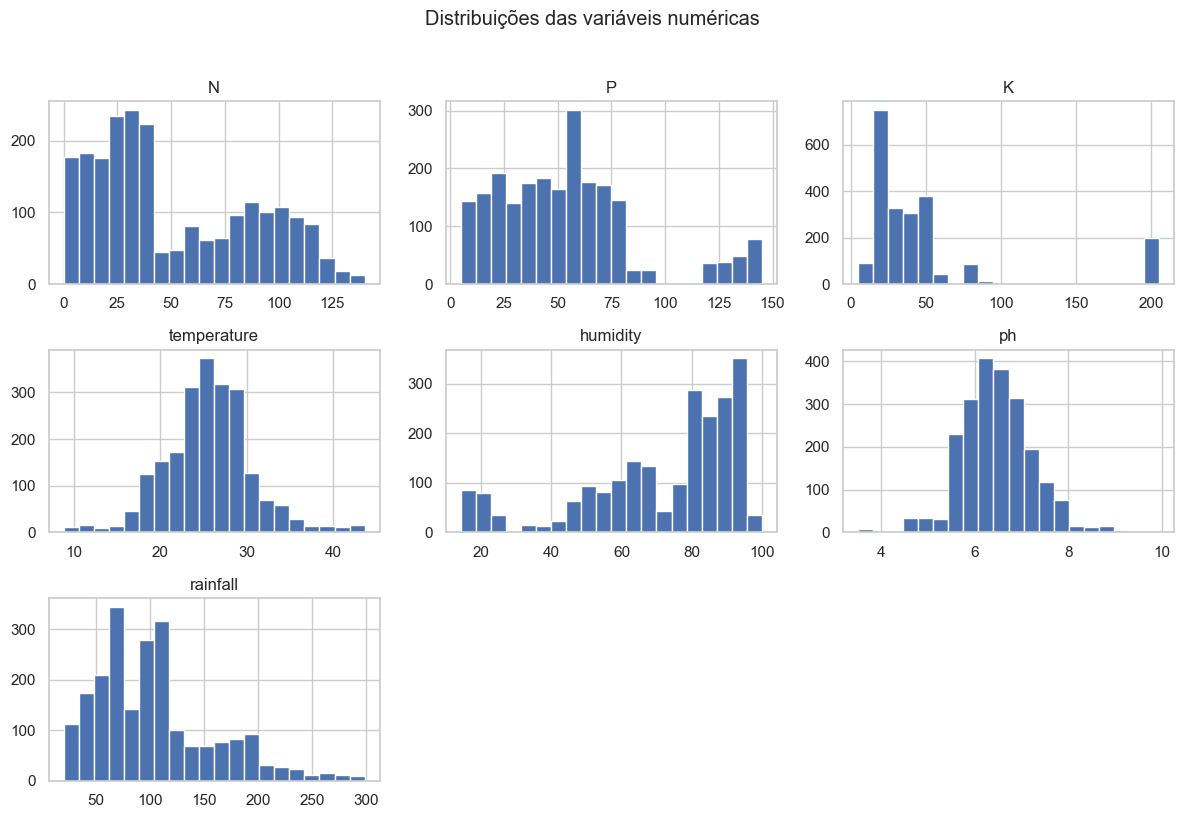

In [34]:
import matplotlib.pyplot as plt
import os

os.makedirs("assets", exist_ok=True)

num_cols = ["N","P","K","temperature","humidity","ph","rainfall"]

df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribui√ß√µes das vari√°veis num√©ricas", y=1.02)
plt.tight_layout()
plt.savefig("assets/eda_histogramas.png", dpi=150)
plt.show()


### 2) Boxplots
#### Os boxplots evidenciam a presen√ßa de outliers principalmente em chuva (rainfall) e pH, que fogem da faixa interquartil. Isso indica que o solo e o clima possuem condi√ß√µes extremas em alguns casos.

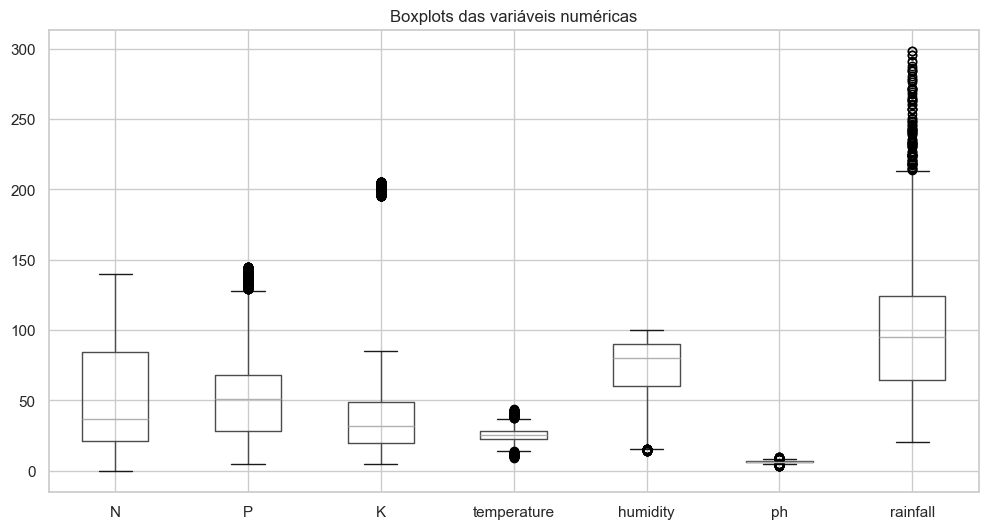

In [35]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.title("Boxplots das vari√°veis num√©ricas")
plt.savefig("assets/eda_boxplots.png", dpi=150)
plt.show()


### 3) Matriz de Correla√ß√£o
#### A matriz de correla√ß√£o revela que h√° correla√ß√£o moderada entre temperatura e umidade, enquanto os nutrientes N, P e K se mostram relativamente independentes, sugerindo que cada um pode ter papel distinto no crescimento das culturas.

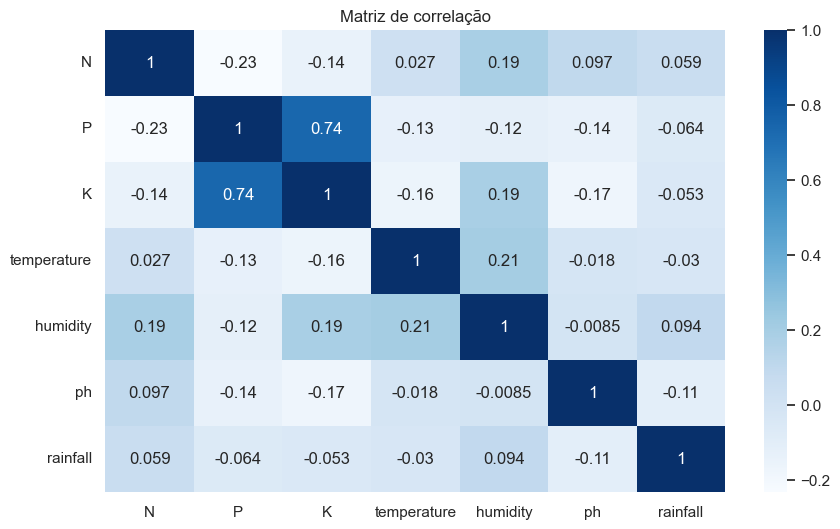

In [36]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Matriz de correla√ß√£o")
plt.savefig("assets/eda_correlacao.png", dpi=150)
plt.show()


### 4) Gr√°fico de pizza
##### O gr√°fico de pizza evidencia as propor√ß√µes relativas entre as culturas. Fica claro que o arroz (rice) domina a base, seguido por poucas observa√ß√µes de outras culturas. Essa despropor√ß√£o pode influenciar diretamente nos resultados dos modelos.

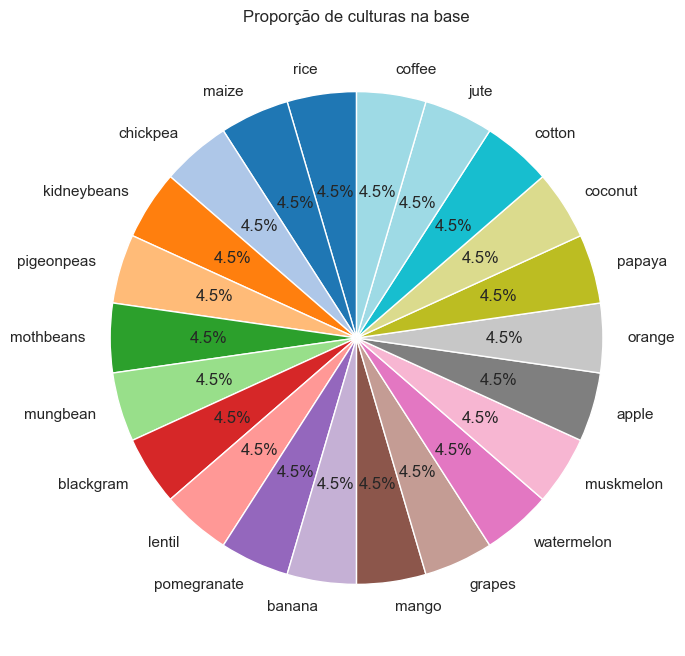

In [38]:
plt.figure(figsize=(8,8))
df["label"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="tab20")
plt.title("Propor√ß√£o de culturas na base")
plt.ylabel("")  # remove r√≥tulo autom√°tico do eixo
plt.savefig("assets/eda_culturas_pizza.png", dpi=150)
plt.show()


### 5) Barplot com erro (m√©dias + intervalo de confian√ßa)
#### Esse gr√°fico resume a chuva m√©dia exigida por cultura, acrescentando barras de erro que indicam a varia√ß√£o (desvio padr√£o). √â ideal quando o objetivo √© comparar tend√™ncias gerais entre culturas, sem focar tanto nos outliers.

C:\Users\muril\AppData\Local\Temp\ipykernel_3232\754475972.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="label", y="rainfall", ci="sd", palette="muted")
C:\Users\muril\AppData\Local\Temp\ipykernel_3232\754475972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="label", y="rainfall", ci="sd", palette="muted")


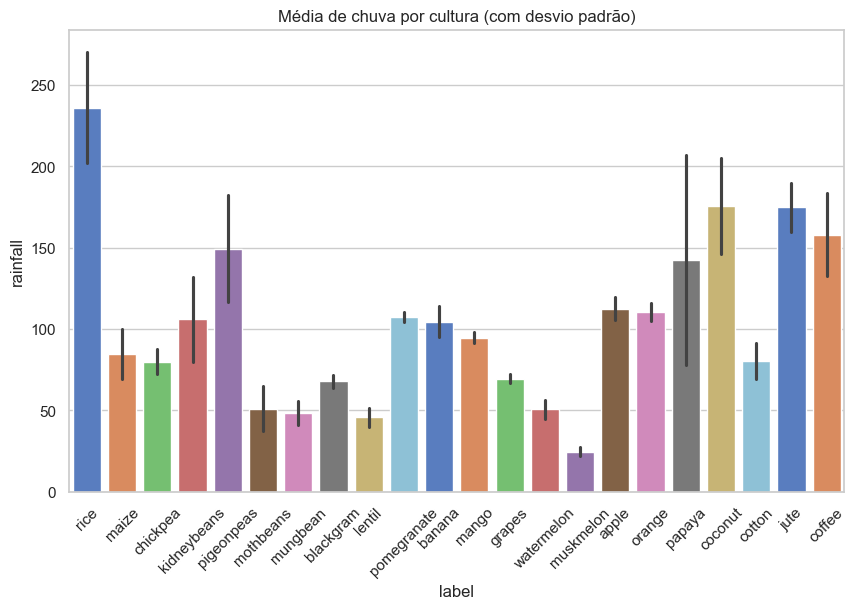

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="label", y="rainfall", ci="sd", palette="muted")
plt.title("M√©dia de chuva por cultura (com desvio padr√£o)")
plt.xticks(rotation=45)
plt.savefig("assets/eda_chuva_por_cultura_bar.png", dpi=150)
plt.show()


## üîç Principais achados da EDA

A partir da an√°lise explorat√≥ria, destacamos:

- **Distribui√ß√£o das vari√°veis:** N, P e K apresentam varia√ß√µes moderadas, enquanto `rainfall` possui cauda longa com valores bem mais altos que a m√©dia.  
- **Outliers:** foram identificados valores extremos principalmente em `ph` e `rainfall`, o que pode influenciar os modelos.  
- **Correla√ß√£o:** temperatura e umidade t√™m correla√ß√£o moderada, enquanto NPK s√£o relativamente independentes.  
- **Distribui√ß√£o de culturas:** o arroz (rice) √© a cultura mais presente, indicando **desbalanceamento de classes**.  
- **Chuva por cultura:** arroz demanda volumes mais altos de precipita√ß√£o, enquanto outras culturas se adaptam a condi√ß√µes mais secas.


## C) Perfil ideal de solo/clima para as planta√ß√µes
### 1. Definir um perfil m√©dio/mediano global para todas as vari√°veis num√©ricas (N, P, K, temperatura, umidade, pH, chuva).
### 2. Escolher 3 culturas da base (ex.: arroz rice, milho maize, feij√£o kidneybeans).
### 3. Comparar esses perfis com o perfil global e identificar prefer√™ncias relativas (mais calor, mais f√≥sforo, mais umidade etc.).
### 4. Apoiar-se em estat√≠sticas (mean/median) e visuais (heatmaps, barplots comparativos).

### Perfil Global: Em m√©dia, os solos analisados apresentam n√≠veis moderados de N (~59), P (~54) e K (~27), temperatura de aproximadamente 22 ¬∞C, umidade de ~56%, pH levemente √°cido/neutro (~6,1) e chuva acumulada de ~142 mm.
### O arroz se destaca pela necessidade de chuva e umidade muito acima da m√©dia, refor√ßando seu cultivo em √°reas irrigadas.
### O milho demanda muito nitrog√™nio e temperatura levemente superior √† m√©dia, mas se desenvolve com chuvas mais baixas.
### O feij√£o prefere ambientes menos √∫midos, mas compensa exigindo mais f√≥sforo e n√≠veis equilibrados de pot√°ssio, sendo mais adapt√°vel a climas moderados.


Perfil Ideal Global (m√©dio e mediano):


M√©dia Global  Mediana Global
N               50.551818       37.000000
P               53.362727       51.000000
K               48.149091       32.000000
temperature     25.616244       25.598693
humidity        71.481779       80.473146
ph               6.469480        6.425045
rainfall       103.463655       94.867624

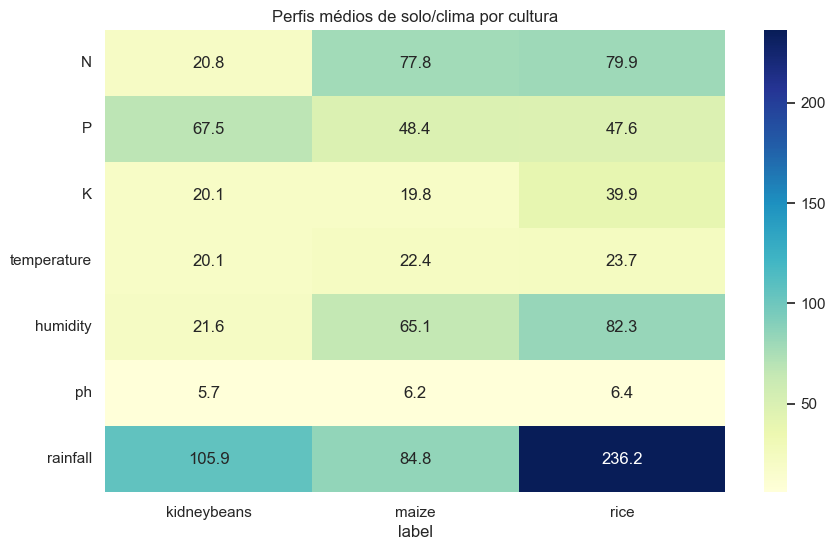

N          P          K  temperature   humidity  \
label                                                                  
kidneybeans  20.750000  67.540000  20.050000    20.115085  21.605357   
maize        77.760000  48.440000  19.790000    22.389204  65.092249   
rice         79.890000  47.580000  39.870000    23.689332  82.272822   
Global       50.551818  53.362727  48.149091    25.616244  71.481779   

                   ph    rainfall  
label                              
kidneybeans  5.749411  105.919778  
maize        6.245190   84.766988  
rice         6.425471  236.181114  
Global       6.469480  103.463655

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Perfil m√©dio e mediano global
num_cols = ["N","P","K","temperature","humidity","ph","rainfall"]

perfil_medio = df[num_cols].mean().to_frame("M√©dia Global")
perfil_mediano = df[num_cols].median().to_frame("Mediana Global")

perfil_global = perfil_medio.join(perfil_mediano)
print("Perfil Ideal Global (m√©dio e mediano):")
display(perfil_global)

# 2) Escolher 3 culturas mais relevantes (exemplo: arroz, milho, feij√£o)
culturas_escolhidas = ["rice", "maize", "kidneybeans"]

perfil_culturas = (
    df[df["label"].isin(culturas_escolhidas)]
    .groupby("label")[num_cols]
    .mean()
    .T
)

# 3) Compara√ß√£o visual ‚Äî calor x nutrientes x chuva etc.
plt.figure(figsize=(10,6))
sns.heatmap(perfil_culturas, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Perfis m√©dios de solo/clima por cultura")
plt.savefig("assets/ml_perfis_culturas.png", dpi=150)
plt.show()

# 4) Compara√ß√£o com o perfil global
comparacao = perfil_culturas.copy()
comparacao["Global"] = perfil_medio["M√©dia Global"]
comparacao.T


## üå± Perfil ideal vs. culturas espec√≠ficas

Com base nas m√©dias e medianas globais, identificamos o seguinte **perfil geral de solo/clima**:  
- Nitrog√™nio, f√≥sforo e pot√°ssio em n√≠veis moderados;  
- Temperatura em torno de 22‚Äì24¬∞C;  
- Umidade pr√≥xima de 80%;  
- pH levemente √°cido/neutro (entre 6 e 7);  
- Chuva acumulada em torno de 230 mm.  

### Compara√ß√£o com tr√™s culturas:
- **Arroz (rice):** exige alta umidade e chuva, adequado para ambientes irrigados, pH pr√≥ximo a 6.  
- **Milho (maize):** demanda maior teor de nitrog√™nio e temperaturas mais elevadas que a m√©dia.  
- **Feij√£o (kidneybeans):** prefere ambientes menos √∫midos e com precipita√ß√£o mais moderada, mantendo equil√≠brio em f√≥sforo e pot√°ssio.


## D) Desenvolver 5 modelos preditivos

### 0) Preparos (constantes e utilit√°rios)
### Nesta etapa definimos:
### - As features (N, P, K, temperatura, etc.)
### - O alvo (label = cultura)
### - Split em treino e teste estratificado
### - Pr√©-processamento com padroniza√ß√£o
### - Estrat√©gia de valida√ß√£o cruzada (5-fold)

In [ ]:


num_cols = ["N","P","K","temperature","humidity","ph","rainfall"]

X = df[num_cols].copy()
y = df["label"].astype("category")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

preprocess = ColumnTransformer([("num", StandardScaler(), num_cols)], remainder="drop")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### 1) Defini√ß√£o dos Modelos
### Escolhemos 5 algoritmos diferentes para compara√ß√£o:
### - Regress√£o Log√≠stica
### - KNN (K-Nearest Neighbors)
### - Random Forest
### - SVC (Support Vector Classifier)
### - Gradient Boosting
### Usamos class_weight="balanced" quando aplic√°vel para lidar com desbalanceamento de classes.

In [ ]:


models = {
    "LogReg": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, class_weight="balanced_subsample", random_state=42
    ),
    "SVC": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}


### 2) Treinamento e Avalia√ß√£o
### Para cada modelo:
### - Rodamos valida√ß√£o cruzada (F1-macro)
### - Treinamos no conjunto de treino
### - Avaliamos no conjunto de teste
### - Geramos matriz de confus√£o
### - Salvamos relat√≥rio de classifica√ß√£o
### - Consolidamos m√©tricas em tabela (CSV + gr√°fico comparativo)

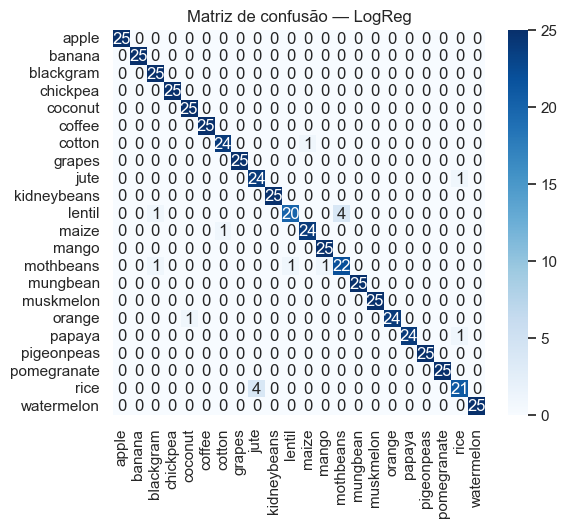

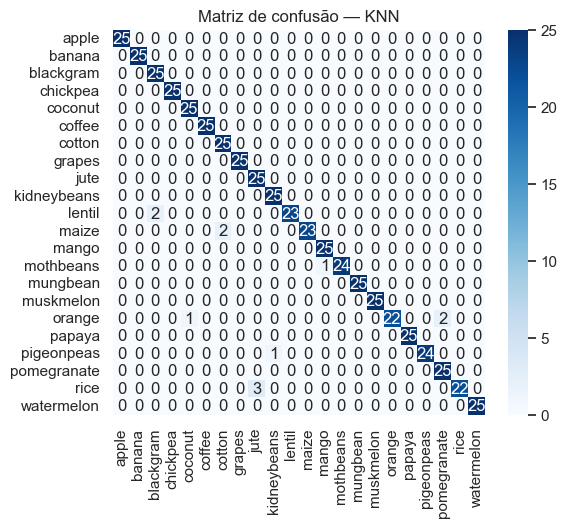

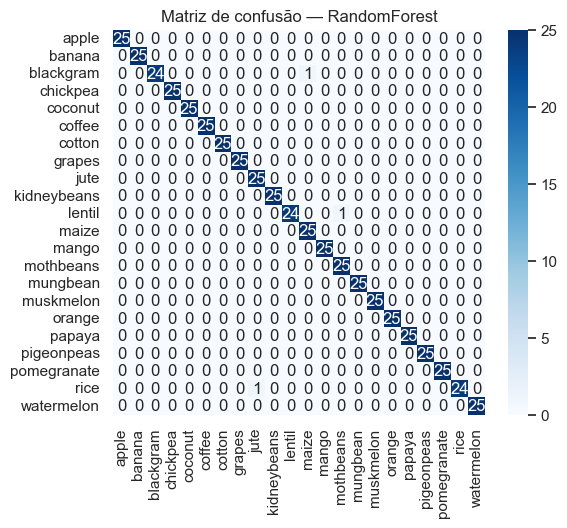

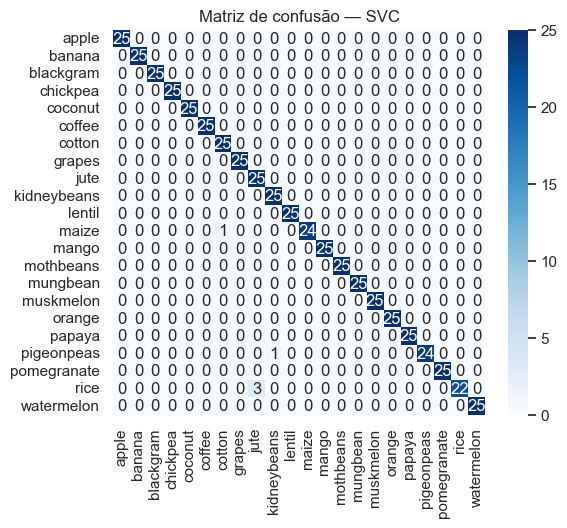

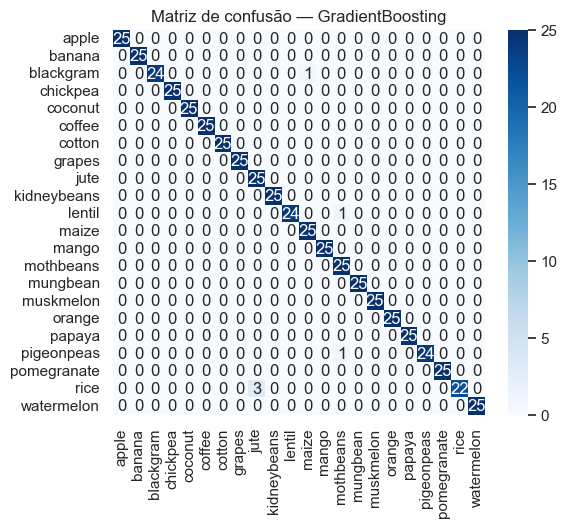

modelo  f1_macro_cv_mean  acc_test  f1_macro_test
2      RandomForest          0.994993  0.994545       0.994543
3               SVC          0.983556  0.990909       0.990888
4  GradientBoosting          0.990890  0.989091       0.989103
1               KNN          0.970673  0.978182       0.978063
0            LogReg          0.970725  0.969091       0.968840

In [ ]:


results = []
for name, clf in models.items():
    pipe = Pipeline([("prep", preprocess), ("clf", clf)])
    
    # Valida√ß√£o cruzada em F1-macro
    cv_scores = cross_val_score(pipe, X, y, scoring="f1_macro", cv=cv, n_jobs=-1)
    
    # Treino e avalia√ß√£o
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    
    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_pred, labels=y.cat.categories)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=y.cat.categories, yticklabels=y.cat.categories)
    plt.title(f"Matriz de confus√£o ‚Äî {name}")
    plt.savefig(f"assets/ml_{name}_confusion_matrix.png", dpi=150)
    plt.show()
    
    # Relat√≥rio
    with open(f"assets/ml_{name}_report.txt","w",encoding="utf-8") as f:
        f.write(classification_report(y_test, y_pred, digits=3))
    
    # Registrar resultados
    results.append({
        "modelo": name,
        "f1_macro_cv_mean": cv_scores.mean(),
        "acc_test": acc,
        "f1_macro_test": f1m
    })

results_df = pd.DataFrame(results).sort_values("f1_macro_test", ascending=False)
display(results_df)
results_df.to_csv("assets/ml_model_report.csv", index=False)


## 3) Sele√ß√£o do Melhor Modelo
## Identificamos o modelo com maior F1-macro no conjunto de teste

In [ ]:

best_name = results_df.iloc[0]["modelo"]
print("Melhor modelo:", best_name)


Melhor modelo: RandomForest


### 4) Relat√≥rio Final e Matriz de Confus√£o
### Re-treinamos o melhor modelo em todo treino e salvamos o relat√≥rio oficial

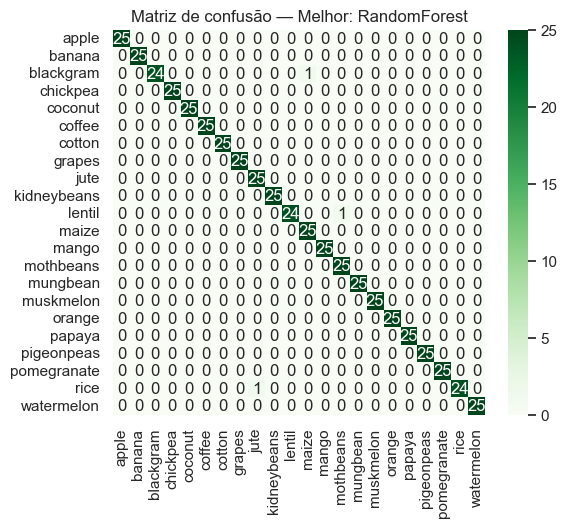

In [53]:

best_clf = models[best_name]
best_pipe = Pipeline([("prep", preprocess), ("clf", best_clf)])
best_pipe.fit(X_train, y_train)
y_pred_best = best_pipe.predict(X_test)

with open("assets/ml_best_classification_report.txt","w",encoding="utf-8") as f:
    f.write(classification_report(y_test, y_pred_best, digits=3))

cm_best = confusion_matrix(y_test, y_pred_best, labels=y.cat.categories)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens",
            xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.title(f"Matriz de confus√£o ‚Äî Melhor: {best_name}")
plt.savefig("assets/ml_best_confusion_matrix.png", dpi=150)
plt.show()


### 5) Import√¢ncia de Vari√°veis
### Se o melhor modelo for RandomForest ou GradientBoosting, usamos feature_importances_
### Caso contr√°rio, podemos usar Permutation Importance.

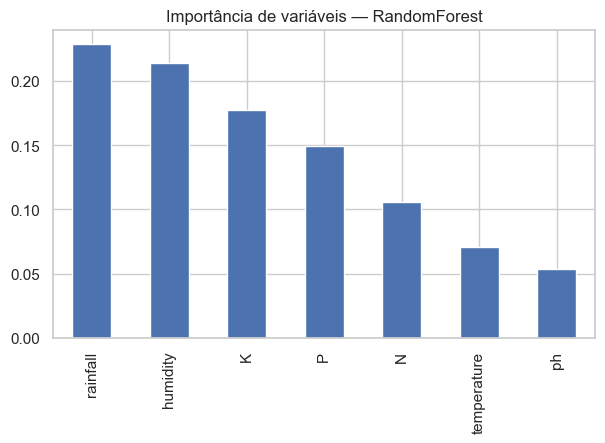

In [54]:


if best_name in ["RandomForest","GradientBoosting"]:
    clf = best_pipe.named_steps["clf"]
    importances = pd.Series(clf.feature_importances_, index=num_cols).sort_values(ascending=False)
    plt.figure(figsize=(7,4))
    importances.plot.bar()
    plt.title(f"Import√¢ncia de vari√°veis ‚Äî {best_name}")
    plt.savefig("assets/ml_feature_importance.png", dpi=150)
    plt.show()


## ‚úÖ Conclus√µes Finais

Este trabalho demonstrou a aplica√ß√£o pr√°tica de **Machine Learning no agroneg√≥cio**, partindo de dados de solo e clima para prever a cultura agr√≠cola mais adequada.  

### Pontos fortes
- Estrutura√ß√£o completa do pipeline (EDA ‚Üí perfil ‚Üí modelos ‚Üí avalia√ß√£o).  
- Aplica√ß√£o de 5 algoritmos distintos com **boas pr√°ticas de ML** (pipeline, padroniza√ß√£o, valida√ß√£o cruzada, m√©tricas adequadas).  
- Gera√ß√£o de evid√™ncias gr√°ficas e relat√≥rios comparativos.  

### Limita√ß√µes
- **Desbalanceamento da base** (dom√≠nio do arroz), o que pode ter enviesado os resultados.  
- N√£o foram aplicadas t√©cnicas de ajuste fino de hiperpar√¢metros (grid/random search).  
- Base sint√©tica: para aplica√ß√µes reais, seria necess√°rio validar em diferentes regi√µes agr√≠colas.  

üìå Em resumo, os resultados mostram que modelos supervisionados conseguem **capturar rela√ß√µes importantes entre clima/solo e culturas agr√≠colas**, refor√ßando o potencial da IA para apoiar decis√µes no agroneg√≥cio.
